In [1]:
#Importing necessary libraries
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException

**1. Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars.**

In [10]:
#Taking input from user for the product to search-
search_product = input("Enter the product to search: ")

Enter the product to search: guitar


In [48]:
#Connecting selenium with web browser and searching entered product on Amazon-
driver= webdriver.Chrome()
driver.get('https://www.amazon.in')

In [49]:
search_element=driver.find_element(By.XPATH,'//div[@class="nav-search-field "]//input')
search_element.send_keys(f"{search_product}")
search_button=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

**2. In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.**

In [50]:
#Creating variables for required data-
brand_name=[]
name_of_product=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]

In [51]:
#Scrap all products URls-
product_urls=[]
start=0
end=3
for page in range(start,end):
    urls=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in urls:
        product_urls.append(i.get_attribute('href'))
    next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next_button.click()
    time.sleep(2)

In [52]:
len(product_urls)

169

In [53]:
#Extracting data as required-
for url in product_urls:
    driver.get(url)
    time.sleep(2)
    
    try:
        Brand= driver.find_element(By.XPATH,'//span[@class="a-size-base po-break-word"]')
        brand_name.append(Brand.text)
    except: 
        NoSuchElementException
        brand_name.append('-')
    try:
        name= driver.find_element(By.XPATH,'//h1[@class="a-size-large a-spacing-none"]')
        name_of_product.append(name.text)
    except:
        NoSuchElementException
        name_of_product.append('-')
    try:
        Price= driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
        price.append(Price.text)
    except: 
        NoSuchElementException
        price.append('-')
    try:
        RE= driver.find_element(By.XPATH,'//li[@class="a-carousel-card tw-scroll-carousel-element"][3]')
        return_exchange.append(RE.text)
    except:
        NoSuchElementException
        return_exchange.append('-')
    try:
        delivery= driver.find_element(By.XPATH,'//div[@class="a-spacing-base"][1]')
        expected_delivery.append(delivery.text)
    except:
        NoSuchElementException
        expected_delivery.append('-')
    try:
        Availability= driver.find_element(By.XPATH,'//span[@class="a-size-medium a-color-success"]')
        availability.append(Availability.text)
    except: 
        NoSuchElementException
        availability.append('-')

In [54]:
print(len(brand_name),len(name_of_product),len(price),len(return_exchange),len(expected_delivery),len(availability),len(product_urls))

169 169 169 169 169 169 169


In [60]:
#Creating DataFrame for the required data-
df=pd.DataFrame({'Brand name':brand_name,'Name of Product':name_of_product,'Price':price,'Return/Exchange':return_exchange,'Expected Delivery':expected_delivery,'Availability':availability,'Product URL':product_urls})
df

,Brand name,Name of Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","₹4,899",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence,Kadence Frontier guitar with Online Guitar lea...,"₹4,799",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"₹9,999",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Henrix,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"₹3,199",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,JUAREZ,"Juarez Lindenwood Acoustic Guitar, 38 Inches C...","₹2,199",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",In stock,https://www.amazon.in/JUAREZ-JRZ38C-Handed-Aco...
...,...,...,...,...,...,...,...
164,JUAREZ,"JUAREZ Wood Acoustic Guitar, [Left Handed] 96....","₹2,516\n56",7 days Replacement,"FREE delivery Friday, 3 May. Details",In stock,https://www.amazon.in/Acoustic-Cutaway-TBLS-St...
165,Epiphone,Epiphone Les Paul Special VE 6 Strings Right H...,"₹19,880",7 days Replacement,"FREE delivery Tuesday, 30 April. Details",-,https://www.amazon.in/Epiphone-Paul-Special-VE...
166,YAMAHA,Yamaha L-Series LS6 Concert Size Acoustic-Elec...,"₹57,000",Top Brand,"FREE delivery Sunday, 5 May. Details",-,https://www.amazon.in/Yamaha-LS6-Concert-Acous...
167,Kadence,"Kadence Slowhand Solid Spruce Top SH101, Premi...","₹14,999",7 days Replacement,"FREE delivery Saturday, 4 May. Details",In stock,https://www.amazon.in/Kadence-Slowhand-Premium...


In [62]:
df['Expected Delivery']=df['Expected Delivery'].str.replace('.Details','')
df['Expected Delivery']=df['Expected Delivery'].str.replace('FREE delivery','')
df

,Brand name,Name of Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","₹4,899",7 days Replacement,"Tuesday, 30 April.",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence,Kadence Frontier guitar with Online Guitar lea...,"₹4,799",7 days Replacement,"Tuesday, 30 April.",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"₹9,999",7 days Replacement,"Tuesday, 30 April.",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Henrix,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"₹3,199",7 days Replacement,"Tuesday, 30 April.",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,JUAREZ,"Juarez Lindenwood Acoustic Guitar, 38 Inches C...","₹2,199",7 days Replacement,"Tuesday, 30 April.",In stock,https://www.amazon.in/JUAREZ-JRZ38C-Handed-Aco...
...,...,...,...,...,...,...,...
164,JUAREZ,"JUAREZ Wood Acoustic Guitar, [Left Handed] 96....","₹2,516\n56",7 days Replacement,"Friday, 3 May.",In stock,https://www.amazon.in/Acoustic-Cutaway-TBLS-St...
165,Epiphone,Epiphone Les Paul Special VE 6 Strings Right H...,"₹19,880",7 days Replacement,"Tuesday, 30 April.",-,https://www.amazon.in/Epiphone-Paul-Special-VE...
166,YAMAHA,Yamaha L-Series LS6 Concert Size Acoustic-Elec...,"₹57,000",Top Brand,"Sunday, 5 May.",-,https://www.amazon.in/Yamaha-LS6-Concert-Acous...
167,Kadence,"Kadence Slowhand Solid Spruce Top SH101, Premi...","₹14,999",7 days Replacement,"Saturday, 4 May.",In stock,https://www.amazon.in/Kadence-Slowhand-Premium...


**3. Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.**

In [97]:
#Connecting selenium with web browser-
driver=webdriver.Chrome()
driver.get('https://images.google.com/')

In [98]:
#Searching elements using search bar-
search_bar=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys('fruits')
search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_button.click()

In [99]:
#Creating variables
fruit_img_urls= []

In [100]:
#Extracting data-
images= driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')[:11]
for i in images:
    source = i.get_attribute('src')
    fruit_img_urls.append(source)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
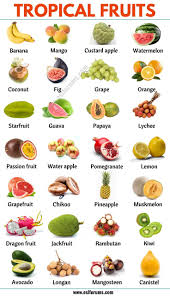
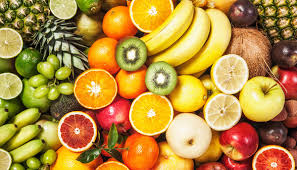
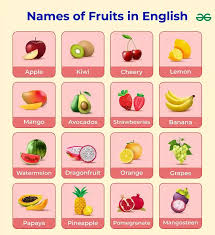
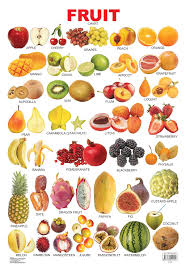
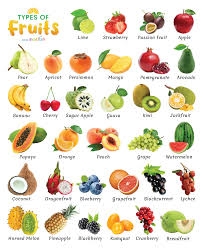
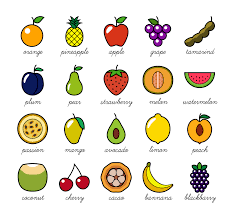
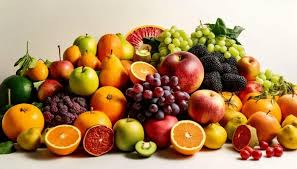
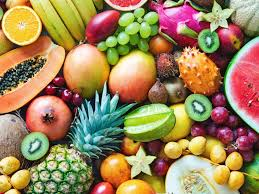
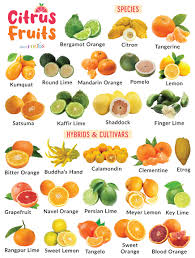
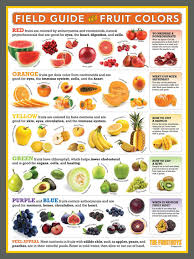
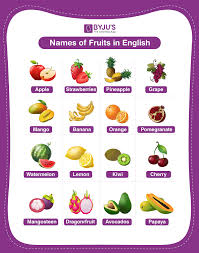

In [101]:
fruit_img_urls

**4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV.**

In [28]:
#Connecting selenium with web browser-
driver=webdriver.Chrome()
driver.get('https://www.flipkart.com')

In [32]:
#Searching required smartphone and the click as per the requirement-
smartphone= driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input")
smartphone.send_keys('Oneplus Nord CE4')

search= driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button")
search.click()

In [81]:
#Creating variables for required data-
smartphone_name=[]
colour=[]
RAM=[]
primary_camera=[]
display_size=[]
battery_capacity=[]
price=[]
product_url=[]

In [50]:
#Scraping smartphone name from the given page-
name_tag= driver.find_elements(By.XPATH,'//div[@class="KzDlHZ"]')
for i in name_tag:
    names=i.text
    smartphone_name.append(names)
            
#Scraping RAM from the given page-    
RAM_tag= driver.find_elements(By.XPATH,'//li[@class="J+igdf"][1]')
for i in RAM_tag:
    rams=i.text
    RAM.append(rams)

#Scraping primary camera from the given page-
camera_tag= driver.find_elements(By.XPATH,'//li[@class="J+igdf"][3]')
for i in camera_tag:
    p_camera=i.text
    primary_camera.append(p_camera)
            
#Scraping display size from the given page-
display_tag= driver.find_elements(By.XPATH,'//li[@class="J+igdf"][2]')
for i in display_tag:
    display=i.text
    display_size.append(display)
            
#Scraping battery capacity from the given page-
battery_tag= driver.find_elements(By.XPATH,'//li[@class="J+igdf"][4]')
for i in battery_tag:
    battery=i.text
    battery_capacity.append(battery)
    
#Scraping price from the given page-
price_tag= driver.find_elements(By.XPATH,'//div[@class="Nx9bqj _4b5DiR"]')
for i in price_tag:
    prices=i.text
    price.append(prices)
            
#Scraping product url from the given page-
url_tag= driver.find_elements(By.XPATH,'//a[@class="CGtC98"]')
for i in url_tag:
    product_url.append(i.get_attribute('href'))

In [51]:
print(len(smartphone_name),len(RAM),len(primary_camera),len(display_size),len(battery_capacity),len(price),len(product_url))

23 23 23 23 23 23 23


In [79]:
#Creating DataFrame for the required data-
df=pd.DataFrame({'Smartphone name':smartphone_name,'RAM':RAM,'Primary Camera':primary_camera,'Display Size':display_size,'Battery Capacity':battery_capacity,'Price':price,'Product URL':product_url})
df

,Smartphone name,RAM,Primary Camera,Display Size,Battery Capacity,Price,Product URL
0,"OnePlus Nord CE4 (Dark Chrome, 128 GB)",8 GB RAM | 128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5500 mAh Battery,"₹24,429",https://www.flipkart.com/oneplus-nord-ce4-dark...
1,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,995",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
2,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,945",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
3,"OnePlus Nord CE 5G (Charcoal Ink, 128 GB)",6 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹22,989",https://www.flipkart.com/oneplus-nord-ce-5g-ch...
4,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",6 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
5,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹17,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
6,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹17,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
7,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",6 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,990",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
8,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",8 GB RAM | 128 GB ROM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,499",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
9,"OnePlus Nord CE 5G (Blue Void, 256 GB)",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-ce-5g-bl...


In [80]:
df['Colour']=df['Smartphone name'].str.split('(').str.get(1).str.split(',').str.get(0)
df['ROM']=df['RAM'].str.split('\|').str.get(1)
df['RAM']=df['RAM'].str.split('\|').str.get(0)
df['Secondary Camera']=df['Primary Camera'].str.split('\|').str.get(1).fillna('-')
df['Primary Camera']=df['Primary Camera'].str.split('\|').str.get(0)
df['Brand Name']=df['Smartphone name'].str.extract(r'^(\w+)')
df

,Smartphone name,RAM,Primary Camera,Display Size,Battery Capacity,Price,Product URL,Colour,ROM,Secondary Camera,Brand Name
0,"OnePlus Nord CE4 (Dark Chrome, 128 GB)",8 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5500 mAh Battery,"₹24,429",https://www.flipkart.com/oneplus-nord-ce4-dark...,Dark Chrome,128 GB ROM,-,OnePlus
1,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,995",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Bahama Blue,128 GB ROM,-,OnePlus
2,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,945",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Bahama Blue,128 GB ROM,-,OnePlus
3,"OnePlus Nord CE 5G (Charcoal Ink, 128 GB)",6 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹22,989",https://www.flipkart.com/oneplus-nord-ce-5g-ch...,Charcoal Ink,128 GB ROM,-,OnePlus
4,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",6 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Bahama Blue,128 GB ROM,-,OnePlus
5,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹17,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Bahama Blue,128 GB ROM,-,OnePlus
6,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",8 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹17,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Gray Mirror,128 GB ROM,-,OnePlus
7,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",6 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹23,990",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Gray Mirror,128 GB ROM,-,OnePlus
8,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",8 GB RAM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,499",https://www.flipkart.com/oneplus-nord-ce-2-5g-...,Gray Mirror,128 GB ROM,-,OnePlus
9,"OnePlus Nord CE 5G (Blue Void, 256 GB)",12 GB RAM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-ce-5g-bl...,Blue Void,256 GB ROM,-,OnePlus


**5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.**

In [104]:
import re

In [102]:
#Connecting selenium with web browser-
driver=webdriver.Chrome()
driver.get('https://www.google.com/maps')

In [103]:
#Searching city and the click as per the requirement-
smartphone= driver.find_element(By.XPATH,'//input[@class="searchboxinput xiQnY"]')
smartphone.send_keys('Chandigarh')

search= driver.find_element(By.XPATH,'//span[@class="google-symbols"]')
search.click()

In [110]:
#Extracting coordinates-
url_string=driver.current_url
print("URL extracted: ",url_string)

URL extracted:  https://www.google.com/maps/place/Chandigarh/@30.7324719,76.6062411,11z/data=!4m15!1m8!3m7!1s0x390fed0be66ec96b:0xa5ff67f9527319fe!2sChandigarh!3b1!8m2!3d30.7333148!4d76.7794179!16zL20vMDFmMXE4!3m5!1s0x390fed0be66ec96b:0xa5ff67f9527319fe!8m2!3d30.7333148!4d76.7794179!16zL20vMDFmMXE4?entry=ttu


In [114]:
lat_lng=re.findall(r'@(.*)/data',url_string)
lat_lng

['30.7324719,76.6062411,11z']

**6. Write a program to scrap all the available details of best gaming laptops from digit.in.**

In [117]:
#Connecting selenium with web browser-
driver=webdriver.Chrome()
driver.get('https://www.digit.in')

In [129]:
#Clicking on Top 10s-
options= driver.find_element(By.XPATH,"//*[text()='Top 10s']")
options.click()

In [131]:
#Clicking on Best AI (Artificial Intelligence) Gaming Laptops in India-
game_laptop= driver.find_element(By.XPATH,"//*[text()='Best AI (Artificial Intelligence) Gaming Laptops in India']")
game_laptop.click()

In [152]:
#Creating variables-
rank=[]
name=[]
os=[]
display_size=[]
processor=[]

In [153]:
#Scraping rank from the given page-
rank_tag= driver.find_elements(By.XPATH,'//li[@class="numbering"]')
for i in rank_tag:
    ranks=i.text
    rank.append(ranks)
            
#Scraping name from the given page-    
name_tag= driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in name_tag:
    names=i.text
    name.append(names)

#Scraping operating system from the given page-
os_tag= driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[1]')
for i in os_tag:
    ops=i.text
    os.append(ops)
    
#Scraping display size from the given page-    
display_tag= driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[2]')
for i in display_tag:
    displays=i.text
    display_size.append(displays)

#Scraping processor from the given page-
processor_tag= driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[4]')
for i in processor_tag:
    processors=i.text
    processor.append(processors)

In [154]:
#Creating DataFrame for the required data-
df=pd.DataFrame({'Rank':rank,'Name':name,'Operating System':os,'Display size':display_size,'Processor':processor})
df

,Rank,Name,Operating System,Display size,Processor
0,1.,Asus ROG Zephyrus G14 GA402XZ-N2019WS,Operating System:\nWindows 11 Home,Display Size :\n14,"Processor :\n7th Gen, AMD Ryzen 9 7940HS"
1,2.,MSI Pulse 17 AI C1VGKG,Operating System:\nWindows 11 Home,Display Size :\n17,Processor :\nIntel Core Ultra 9
2,3.,Acer Nitro 16 AN16-41 | Ryzen 7 7840HS | RTX 4...,Operating System:\nWindows 11 Home,Display Size :\n16,Processor :\nAMD Ryzen 7-7840HS
3,4.,MSI Bravo 15 C7VFKP,Operating System:\nWindows 11 Home,Display Size :\n15.6,Processor :\nAMD Ryzen 7-7000HS
4,5.,ASUS TUF Gaming A16 Advantage Edition (2023) F...,Operating System:\nWindows 11 Home,Display Size :\n16,Processor :\nAMD Ryzen 9-7940HS
5,6.,HP OMEN Gaming Laptop 16 XD0007ax,Operating System:\nWindows 11 Home,Display Size :\n16.1,Processor :\nAMD Ryzen 7-7840HS
6,7.,Dell New G15 5535,Operating System:\nWindows 11 Home,Display Size :\n15.6,Processor :\nAMD Ryzen 5-7640HS


In [155]:
df['Operating System']= df['Operating System'].str.split('\\n').str.get(1)
df['Display size']= df['Display size'].str.split('\\n').str.get(1)
df['Processor']= df['Processor'].str.split('\\n').str.get(1)
df

,Rank,Name,Operating System,Display size,Processor
0,1.,Asus ROG Zephyrus G14 GA402XZ-N2019WS,Windows 11 Home,14,"7th Gen, AMD Ryzen 9 7940HS"
1,2.,MSI Pulse 17 AI C1VGKG,Windows 11 Home,17,Intel Core Ultra 9
2,3.,Acer Nitro 16 AN16-41 | Ryzen 7 7840HS | RTX 4...,Windows 11 Home,16,AMD Ryzen 7-7840HS
3,4.,MSI Bravo 15 C7VFKP,Windows 11 Home,15.6,AMD Ryzen 7-7000HS
4,5.,ASUS TUF Gaming A16 Advantage Edition (2023) F...,Windows 11 Home,16,AMD Ryzen 9-7940HS
5,6.,HP OMEN Gaming Laptop 16 XD0007ax,Windows 11 Home,16.1,AMD Ryzen 7-7840HS
6,7.,Dell New G15 5535,Windows 11 Home,15.6,AMD Ryzen 5-7640HS


**7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.**

In [156]:
#Connecting selenium with web browser-
driver=webdriver.Chrome()
driver.get('https://www.forbes.com')

In [159]:
#Clicking on Menu-
menu= driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div')
menu.click()

In [160]:
#Clicking on Billionaires-
menu= driver.find_element(By.XPATH,'//li[@class="TjJgrPSg cD45ib6e primary"][1]')
menu.click()

In [164]:
#Clicking on World's Billionaires-
billionaires= driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]")
billionaires.click()

In [165]:
#Creating variables for required data-
rank=[]
name=[]
net_worth=[]
age=[]
citizenship=[]
source=[]
industry=[]

In [166]:
start=0
end= 14

for page in range(start, end):

#Scraping rank from the given page-    
    rank_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[1]')
    for i in rank_tag:
        ranks=i.text
        rank.append(ranks)
    
#Scraping name from the given page-
    name_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[2]')
    for i in name_tag:
        names=i.text
        name.append(names)
    
#Scraping net worth from the given page-
    net_worth_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[3]')
    for i in net_worth_tag:
        net_worths=i.text
        net_worth.append(net_worths)
        
#Scraping age from the given page-    
    age_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[4]')
    for i in age_tag:
        ages=i.text
        age.append(ages)
    
#Scraping citizenship from the given page-
    citizenship_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[5]')
    for i in citizenship_tag:
        citizenships=i.text
        citizenship.append(citizenships)
    
#Scraping source from the given page-
    source_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[6]')
    for i in source_tag:
        sources=i.text
        source.append(sources)
        
#Scraping industry from the given page-
    industry_tag= driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY" or @class="Table_tableRow__lF_cY Table_expanded__0lLQ6"]/div[7]')
    for i in industry_tag:
        industries=i.text
        industry.append(industries)
    
#Next button
    next_button= driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[27]/div[7]/div[1]/nav/div/button[7]')
    next_button.click()
    time.sleep(3)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[27]/div[7]/div[1]/nav/div/button[7]"}
  (Session info: chrome=123.0.6312.124); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF646F07032+63090]
	(No symbol) [0x00007FF646E72C82]
	(No symbol) [0x00007FF646D0EC65]
	(No symbol) [0x00007FF646D5499D]
	(No symbol) [0x00007FF646D54ADC]
	(No symbol) [0x00007FF646D95B37]
	(No symbol) [0x00007FF646D7701F]
	(No symbol) [0x00007FF646D93412]
	(No symbol) [0x00007FF646D76D83]
	(No symbol) [0x00007FF646D483A8]
	(No symbol) [0x00007FF646D49441]
	GetHandleVerifier [0x00007FF6473025AD+4238317]
	GetHandleVerifier [0x00007FF64733F70D+4488525]
	GetHandleVerifier [0x00007FF6473379EF+4456495]
	GetHandleVerifier [0x00007FF646FE0576+953270]
	(No symbol) [0x00007FF646E7E54F]
	(No symbol) [0x00007FF646E79224]
	(No symbol) [0x00007FF646E7935B]
	(No symbol) [0x00007FF646E69B94]
	BaseThreadInitThunk [0x00007FF8A7B87344+20]
	RtlUserThreadStart [0x00007FF8A8CC26B1+33]


In [169]:
#Checking length
print(len(rank),len(name),len(net_worth),len(age),len(citizenship),len(source),len(industry))

2781 2781 2781 2781 0 0 0


In [170]:
#Creating DataFrame for the required data-
df=pd.DataFrame({'Rank':rank,'Name':name,'Net Worth':net_worth,'Age':age})
df

,Rank,Name,Net Worth,Age
0,1.,Bernard Arnault & family,$233 B,Fashion & Retail
1,2.,Elon Musk,$195 B,Automotive
2,3.,Jeff Bezos,$194 B,Technology
3,4.,Mark Zuckerberg,$177 B,Technology
4,5.,Larry Ellison,$141 B,Technology
...,...,...,...,...
2776,2692.,Zhang Hong,$1 B,Energy
2777,2692.,Zheng Xiaodong,$1 B,Manufacturing
2778,2692.,Zhong Sheng Jian,$1 B,Real Estate
2779,2692.,Zhou Junjie,$1 B,Manufacturing
